# Topic Modeling Clustering on COVID19 Symptoms

# A random selection of topics

In [4]:
import pandas as pd
data = pd.read_csv("2021VAERSDATA.csv", encoding = "ISO-8859-1")
df = data[['VAERS_ID','SYMPTOM_TEXT']].set_index(["VAERS_ID"])
df.rename(columns={'SYMPTOM_TEXT': 'text'}, inplace = True)
 
df.text=df_news.text.astype(str)

In [5]:
df

,text
0,right side epiglottis swelled hinder swallowin...
1,approximately min post vaccination administrat...
2,minutes receiving vaccine patient complained ...
3,extreme fatigue dizziness lift left arm hours
4,injection site swelling redness warm touch itchy
...,...
9265,death narrative patient received first dose co...
9266,patient found unresponsive passed away
9267,received vaccine bit week per caregivers low g...
9268,patient swelling around jaw second shot covid ...


In [6]:
#pip install nltk

In [7]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('\S*\@\S*', '', text)    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\d', '', text)    
    # Remove quotes
#    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

[nltk_data] Downloading package punkt to /home/vmuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# Let's take a look at the updated text
df_clean = pd.DataFrame(df.text.apply(clean_text_1))

In [9]:
df_clean

,text
0,right side epiglottis swelled hinder swallowi...
1,approximately min post vaccination administra...
2,minutes receiving vaccine patient complained ...
3,extreme fatigue dizziness lift left arm hours
4,injection site swelling redness warm touch itchy
...,...
9265,death narrative patient received first dose c...
9266,patient found unresponsive passed away
9267,received vaccine bit week per caregivers low ...
9268,patient swelling around jaw second shot covid...


In [10]:
#pip install wordcloud

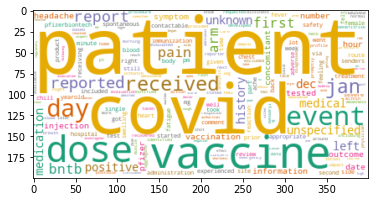

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

alltext=''
for index,row in df_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


In [13]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

import nltk
nltk.download('wordnet')

def lemmatize(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i in word_tokenize(text):
        if len(i) > 3:
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


def lemmatize_tag(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


[nltk_data] Downloading package wordnet to /home/vmuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
data_clean = pd.DataFrame(df_clean.text.apply(lemmatize))

In [15]:
data_clean=df_clean

In [16]:
data_clean

,text
0,right side epiglottis swelled hinder swallowi...
1,approximately min post vaccination administra...
2,minutes receiving vaccine patient complained ...
3,extreme fatigue dizziness lift left arm hours
4,injection site swelling redness warm touch itchy
...,...
9265,death narrative patient received first dose c...
9266,patient found unresponsive passed away
9267,received vaccine bit week per caregivers low ...
9268,patient swelling around jaw second shot covid...


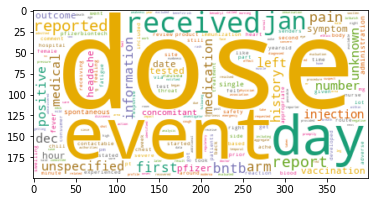

In [24]:
stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['know','well','also','dont','one','would','could','many','may',
                    'think', 'vaccine', 'patient', 'covid'])

alltext=''
for index,row in data_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


## LDA

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2,min_df=2)#, max_df=.9)
data_cv = cv.fit_transform(data_clean.text)
data = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data.index = data_clean.index
data

,aaa,aaox,ab,abate,abated,abbott,abd,abdomen,abdomenpelvis,abdominal,...,zophran,zostavax,zoster,zosterrelated,zosyn,zpack,zpak,zyprexa,zyrtec,zzzquil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from gensim import matutils, models
import scipy.sparse


In [27]:
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,9260,9261,9262,9263,9264,9265,9266,9267,9268,9269
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [29]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [30]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=8)
lda.print_topics()

[(0,
  '0.048*"left" + 0.025*"pain" + 0.022*"right" + 0.018*"arm" + 0.018*"numbness" + 0.017*"side" + 0.015*"swelling" + 0.012*"neck" + 0.011*"injection" + 0.011*"face"'),
 (1,
  '0.017*"blood" + 0.014*"jan" + 0.012*"mrna" + 0.012*"went" + 0.011*"pressure" + 0.010*"said" + 0.009*"hospital" + 0.009*"hours" + 0.009*"fever" + 0.009*"heart"'),
 (2,
  '0.011*"received" + 0.011*"unknown" + 0.011*"pain" + 0.009*"reported" + 0.008*"jan" + 0.007*"symptoms" + 0.007*"dose" + 0.007*"day" + 0.007*"experienced" + 0.006*"fever"'),
 (3,
  '0.024*"pain" + 0.017*"injection" + 0.016*"day" + 0.015*"site" + 0.012*"hours" + 0.012*"days" + 0.011*"severe" + 0.010*"started" + 0.010*"headache" + 0.008*"swelling"'),
 (4,
  '0.016*"pt" + 0.012*"hospital" + 0.009*"given" + 0.008*"chest" + 0.008*"mg" + 0.008*"er" + 0.008*"admitted" + 0.008*"ed" + 0.007*"death" + 0.007*"found"'),
 (5,
  '0.029*"dose" + 0.018*"jan" + 0.018*"reported" + 0.017*"events" + 0.017*"bntb" + 0.017*"received" + 0.015*"first" + 0.015*"unspecif

## Topic Modeling - Nouns Only

In [39]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [40]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(df_news_clean.text.apply(nouns))
data_nouns

,text
0,side epiglottis hinder swallowing pictures ben...
1,post vaccination administration patient anxiou...
2,minutes vaccine patient arm hurting tightness ...
3,fatigue dizziness lift arm hours
4,injection site touch itchy
...,...
9265,death patient covid vaccine wife agency report...
9266,patient
9267,bit week caregivers temp reporting pain mornin...
9268,patient shot covid pfizer vaccine ml im mornin...


In [44]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

add_stop_words = stop_words2
#add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
#                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words, min_df=2)#, min_df=.1, max_df=.9)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,ab,abbott,abd,abdomen,abdominal,abduct,abduction,abilify,ability,ablation,...,zolpidem,zomig,zone,zostavax,zoster,zosyn,zpack,zpak,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [46]:
# Let's start with  topics
ldan = models.LdaModel(corpus=corpusn, num_topics=6, id2word=id2wordn,passes=20)
ldan.print_topics()

[(0,
  '0.048*"blood" + 0.031*"pressure" + 0.031*"jan" + 0.023*"day" + 0.018*"morning" + 0.017*"night" + 0.016*"work" + 0.013*"loss" + 0.011*"medication" + 0.011*"time"'),
 (1,
  '0.031*"minutes" + 0.028*"heart" + 0.026*"pt" + 0.022*"throat" + 0.018*"mg" + 0.016*"breath" + 0.016*"rate" + 0.015*"reaction" + 0.015*"symptoms" + 0.015*"chest"'),
 (2,
  '0.067*"pain" + 0.046*"injection" + 0.042*"arm" + 0.039*"headache" + 0.036*"site" + 0.033*"day" + 0.033*"body" + 0.029*"days" + 0.029*"hours" + 0.028*"chills"'),
 (3,
  '0.020*"date" + 0.019*"history" + 0.019*"infection" + 0.018*"patients" + 0.016*"case" + 0.013*"treatment" + 0.013*"doses" + 0.013*"vaccination" + 0.012*"time" + 0.012*"days"'),
 (4,
  '0.029*"weakness" + 0.028*"hospital" + 0.023*"pain" + 0.023*"days" + 0.018*"resident" + 0.017*"emergency" + 0.016*"breath" + 0.013*"symptoms" + 0.012*"care" + 0.012*"vision"'),
 (5,
  '0.045*"events" + 0.041*"jan" + 0.032*"bntb" + 0.029*"number" + 0.027*"information" + 0.026*"history" + 0.022*"d

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [47]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [48]:
#import nltk
#nltk.download('averaged_perceptron_tagger')

In [49]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text.apply(nouns_adj))
data_nouns_adj

,text
0,right side epiglottis hinder swallowing pictur...
1,min post vaccination administration patient so...
2,minutes vaccine patient left arm hurting chest...
3,extreme fatigue dizziness lift arm hours
4,injection site redness warm touch itchy
...,...
9265,death narrative patient dose covid vaccine wif...
9266,patient unresponsive
9267,vaccine bit week caregivers low temp reporting...
9268,patient jaw second shot covid pfizer vaccine m...


In [50]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, min_df=2)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaa,ab,abate,abbott,abd,abdomen,abdominal,abduct,abduction,abilify,...,zolpidem,zomig,zone,zostavax,zoster,zosyn,zpack,zpak,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [52]:
ldan_2 = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=30)

ldan_2.print_topics()

[(0,
  '0.035*"injection" + 0.028*"site" + 0.027*"arm" + 0.022*"rash" + 0.020*"days" + 0.019*"throat" + 0.017*"mg" + 0.017*"benadryl" + 0.016*"day" + 0.014*"red"'),
 (1,
  '0.028*"hospital" + 0.019*"pt" + 0.016*"heart" + 0.013*"home" + 0.012*"breath" + 0.011*"chest" + 0.011*"minutes" + 0.010*"er" + 0.010*"rate" + 0.010*"emergency"'),
 (2,
  '0.026*"pain" + 0.022*"blood" + 0.020*"arm" + 0.020*"jan" + 0.015*"right" + 0.015*"pressure" + 0.014*"day" + 0.010*"night" + 0.010*"morning" + 0.010*"shot"'),
 (3,
  '0.045*"pain" + 0.043*"headache" + 0.033*"chills" + 0.029*"fever" + 0.028*"body" + 0.027*"hours" + 0.025*"day" + 0.023*"nausea" + 0.022*"fatigue" + 0.022*"severe"'),
 (4,
  '0.031*"unknown" + 0.023*"events" + 0.020*"death" + 0.019*"history" + 0.018*"date" + 0.018*"medical" + 0.014*"patients" + 0.013*"information" + 0.012*"mrna" + 0.012*"case"'),
 (5,
  '0.030*"jan" + 0.027*"bntb" + 0.026*"events" + 0.024*"unspecified" + 0.022*"positive" + 0.019*"number" + 0.017*"unknown" + 0.017*"inform

## Identify Topics in Each Document

In [59]:
corpus_transformed = ldan[corpusn]


In [60]:
list(corpus_transformed)

[[(0, 0.6184272),
  (1, 0.24711132),
  (2, 0.03433728),
  (3, 0.0333542),
  (4, 0.033415895),
  (5, 0.033354074)],
 [(0, 0.08283836), (1, 0.78021926), (4, 0.10722827)],
 [(0, 0.23969746),
  (1, 0.58092946),
  (2, 0.01134895),
  (3, 0.01112035),
  (4, 0.14577256),
  (5, 0.011131178)],
 [(0, 0.027865952),
  (1, 0.02787414),
  (2, 0.86082935),
  (3, 0.02777853),
  (4, 0.02786859),
  (5, 0.027783427)],
 [(0, 0.033333845),
  (1, 0.03336955),
  (2, 0.833284),
  (3, 0.03333693),
  (4, 0.033333845),
  (5, 0.033341765)],
 [(0, 0.04208949),
  (1, 0.55620635),
  (2, 0.27641675),
  (3, 0.041746862),
  (4, 0.04185972),
  (5, 0.04168082)],
 [(0, 0.21210545),
  (1, 0.011935063),
  (2, 0.7401903),
  (3, 0.011909004),
  (4, 0.011953007),
  (5, 0.011907143)],
 [(0, 0.05626409),
  (1, 0.055558562),
  (2, 0.05608904),
  (3, 0.05555857),
  (4, 0.72081274),
  (5, 0.055717025)],
 [(0, 0.20403473),
  (1, 0.02407173),
  (2, 0.69980556),
  (3, 0.024033124),
  (4, 0.023976738),
  (5, 0.024078108)],
 [(0, 0.04169

In [45]:
topic_prediction=[]
for j in list(corpus_transformed):
    main_topic=j[0][0]
    weigth=j[0][1]
    for t,w in j:
        if w > weigth :
            main_topic=t
            weigth=w
    topic_prediction.append(main_topic)


In [46]:
topic_prediction

[5,
 4,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 0,
 0,
 4,
 4,
 5,
 3,
 0,
 3,
 4,
 2,
 0,
 3,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 5,
 2,
 1,
 2,
 0,
 3,
 4,
 4,
 4,
 1,
 2,
 4,
 0,
 0,
 4,
 2,
 0,
 4,
 4,
 1,
 4,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 4,
 2,
 0,
 0,
 1,
 4,
 3,
 1,
 1,
 3,
 3,
 4,
 3,
 3,
 4,
 1,
 1,
 2,
 3,
 2,
 4,
 2,
 5,
 1,
 1,
 5,
 3,
 1,
 2,
 4,
 2,
 4,
 0,
 0,
 3,
 4,
 2,
 5,
 4,
 2,
 3,
 4,
 4,
 5,
 2,
 1,
 4,
 4,
 4,
 3,
 1,
 4,
 4,
 1,
 2,
 5,
 3,
 1,
 4,
 0,
 1,
 1,
 0,
 4,
 1,
 1,
 1,
 5,
 0,
 2,
 4,
 2,
 1,
 1,
 4,
 0,
 4,
 5,
 4,
 1,
 4,
 4,
 0,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 0,
 2,
 1,
 1,
 4,
 0,
 4,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 5,
 0,
 3,
 1,
 0,
 1,
 5,
 3,
 3,
 5,
 1,
 0,
 4,
 1,
 1,
 3,
 2,
 0,
 1,
 1,
 4,
 0,
 4,
 4,
 2,
 5,
 1,
 0,
 3,
 3,
 1,
 2,
 3,
 1,
 0,
 4,
 4,
 4,
 1,
 2,
 4,
 3,
 5,
 3,
 1,
 2,
 1,
 0,
 4,
 2,
 4,
 3,
 2,
 1,
 1,
 0,
 4,
 3,
 2,
 1,
 4,
 4,
 3,
 1,
 0,
 0,
 4,
 5,
 2,
 1,
 4,
 4,
 1,
 1,
 4,
